**Objectives**

1. Extract corpora from the food description text from the all the meals that contain seafood. Structure the corpora according the text patterns in the description.
    Questions: Is this an acceptable method for the analysis? The text after the comma seems descriptive of the food item, in the context of preparation method.
2. Obtain some descriptive statistics from the corpora. Identify potential issues that are relevant to the analysis objectives and address these issues.
    (1) Obtain most frequent words from corpora and seek potential issues. For example, should beverages be included? Maybe all caloric beverages (everything except water)?
    (2) Obtain the longest strings from the corpora, to identify patterns for simplification and categorization.
    (3) Obtain the least frequent words from the corpora, and seek potential issues. The least used words will most likely be a unique entry that can be grouped into another dish.
    (4) Is there any interest in the descriptive food item text beyond the first comma?
    (5) Could potentially use DR1IFDCD (USDA food items) for the analysis. Need more research on this and if there is a lookup for this code. Perform statistics for correlations between this code and the food text.

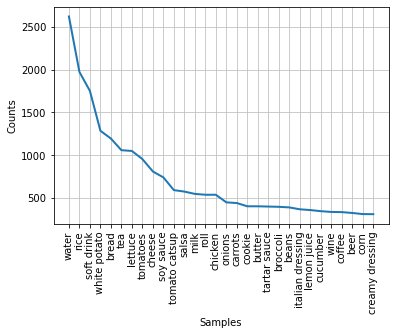

In [1]:
import pandas as pd
import re
import nltk


#Read filtered dataframe
nhanes = pd.read_pickle('../../Data/nhanes_post.pkl')


#Obtain dataframe with seafood items
seafood_df = nhanes[nhanes['DR1I_PF_SEAFD_TOT'] > 0]
#Obtain dataframe with side dishes
side_dish_df = nhanes[nhanes['DR1I_PF_SEAFD_TOT'] == 0]

"""
Obtain initial test corpus for the whole meal, seafood item only, and side dishes only
Obtains the first word in the text description string before a comma, if comma exists.
Obtains the whole string in the text description if comma is not present.
"""
food_type_cps = nhanes['DESCRIPTION'].apply(lambda x: re.search(r'^([^,])+', x).group(0) if re.search((r','), x) else x)
seafood_cps = seafood_df['DESCRIPTION'].apply(lambda x: re.search(r'^([^,])+', x).group(0) if re.search((r','), x) else x)
side_dish_cps = side_dish_df['DESCRIPTION'].apply(lambda x: re.search(r'^([^,])+', x).group(0) if re.search((r','), x) else x)

#Obtain and plot frequency distribution of the side dish words
side_dish_fdist = nltk.FreqDist(side_dish_cps)
side_dish_fdist.plot(30)



**Conclusions**

